<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>


# Finanzdaten Projekt

In diesem Datenprojekt werden wir uns auf die Analyse von Aktienpreise konzentrieren. Denkt dabei daran, dass es hier primär um die Visualisierungs- und Analysefähigkeiten geht, nicht daraum verlässliche Finanzanalysen durchzuführen.

**Achtung**: Dieses Projekt wird eine große Herausforderung weil es eine Menge neuer Konzepte einführt, die ihr selbst recherchieren müsst. Nichtsdestotrotz werden wir die notwendigen Hinweise geben. Dabei sei es jedem freigestellt parallel ins Lösungsnotebook oder das Video-Material zu schauen und dieses Projekt als "Walkthrough" zu lösen.

Wir werden uns nun also Bankaktien anschauen und wie sie sich seit der Finanzkrise bis Anfang 2016 entwickelt haben.

## Die Daten

In dieser Sektion werden wir lernen, wie wir mit Pandas direkt Daten aus Google Fiance lesen können.

Zuerst müssen wir demnach einige Imports machen, welche im Rahmen dieses Projektes gegeben sind.

*Hinweis: Zum korrekten Auslesen der Finanzdaten müssen wir noch den [pandas-datareader](https://github.com/pydata/pandas-datareader) installieren:*

    conda install pandas-datareader

### Die Importe

*Bereits ausgefüllt:*

In [2]:
%pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

### Daten

Wir können die Daten durch verwendung des *Pandas Datareader* erhalten. Dieser liefert uns Aktieninformationen zu den folgenden Banken:

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

**Finde nun heraus, wie du die Aktiendaten vom 5 Jahren zurück bis heute für jede dieser Banken erhälst. Erstelle dazu für jede Bank einen eigenen DataFrame. Die Namen dieser DataFrames sollen dem Ticker Symbol (z.B.: BAC für Bank of America) entsprechen. Das alles benötigt einige Schritte:**

1. Nutze `datetime`, um Start und Ende Objekte zu erstellen.
2. Finde das Ticker Symbol für jede Bank heraus.
3. Finde heraus, wie du den datareader nutzen kannst, um die Informationen zu erhalten.

**Nutze diese [Dokumentationsseite](http://pandas.pydata.org/pandas-docs/stable/ecosystem.html) für Hinweise und Tipps. Es sollte dabei nur um das richtige Ersetzen bestimmter Daten gehen. Nutze "Stooq.com" als Quelle. Zum Beispiel:**

    # Bank of America
    BAC = data.DataReader("BAC","stooq",start,end)

In [4]:
# Achtung die Parameter für start und end haben leider in der aktuellen pandas-datareader Version einen Bug.
start = datetime(2006, 1, 1)
end = datetime(2017, 1, 1)

In [5]:
# Bank of America - BAC
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup - C 
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs - GS
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase - JPM
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley - MS
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo - WFC
WFC = data.DataReader("WFC", 'stooq', start, end)

**Erstelle eine Liste der Ticker Symbole (als String) in alphabetischer Reihenfolge. Nenne diese Liste "tickers".**

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

**Nutze `pd.concat`, um die einzelnen DataFrames zu einem Banken-DataFrame namens "bank_stocks" zusammenzufassen. Setze dabei das Keys (dt. Schlüssel) Argument gleich der tickers-Liste.**

*Hinweis: Achte auf die Achse auf die du `concat` anwendest.*

In [8]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

**Definiere die Spalten namen (bereits vorausgefüllt).**

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Schaue dir den head des bank_stocks DataFrame an.**

In [10]:
bank_stocks.head()

Bank Ticker     BAC                                           C          \
Stock Info     Open    High     Low   Close      Volume    Open    High   
Date                                                                      
2006-01-03   41.442  41.668  40.760  41.582  18450929.0  440.07  443.45   
2006-01-04   41.512  41.726  41.026  41.141  20105410.0  438.82  440.96   
2006-01-05   41.141  41.362  40.912  41.194  16782641.0  435.02  438.07   
2006-01-06   41.334  41.432  40.940  41.132  14259661.0  438.98  439.15   
2006-01-09   41.265  41.486  40.947  41.159  17684099.0  436.45  437.71   

Bank Ticker                             ...      MS                          \
Stock Info      Low   Close     Volume  ...    Open    High     Low   Close   
Date                                    ...                                   
2006-01-03   432.05  442.67  1712139.0  ...  40.034  40.954  39.727  40.827   
2006-01-04   434.20  434.48  2083320.0  ...  41.106  41.510  40.860  40.860   
2006-01-05   434.66  436.62  1264127.0  ...  40.860  41.028  40.622  40.971   
2006-01-06   432.87  436.62  1525744.0  ...  41.154  41.205  40.649  41.012   
2006-01-09   433.75  434.57  1871527.0  ...  41.051  41.518  41.043  41.441   

Bank Ticker                WFC                                      
Stock Info      Volume    Open    High     Low   Close      Volume  
Date                                                                
2006-01-03   6374568.0  23.702  23.986  23.403  23.927  14687538.0  
2006-01-04   9457881.0  23.849  23.864  23.520  23.649  14492354.0  
2006-01-05   6849966.0  23.626  23.664  23.482  23.626  13507351.0  
2006-01-06   8168027.0  23.689  23.829  23.545  23.760  11204308.0  
2006-01-09   4913405.0  23.760  23.864  23.664  23.760   7492296.0  

[5 rows x 30 columns]

## Explorative Datenanalyse

Lasst uns die Daten etwas untersuchen! Doch bevor wir damit loslegen ermutige ich euch, das [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) und die [Nutzung von .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) genauer anzuschauen.

**Was ist der maximale Kurs zum Handelsschluss (en. close price) für jede der Banken in unserer gesamten Zeitperiode?**

In [11]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     48.487
C      506.600
GS     227.820
JPM     78.652
MS      62.530
WFC     50.260
dtype: float64

**Erstelle einen neuen leeren DataFrame namens "returns" (dt. Rendite). Dieser DataFrame wird die Renditen für die Aktien der Banken beinhalten. Renditen sind typischerweise wie folgt definiert:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

**Wir können nun Pandas `pct_change()` Methode auf den Schlusskurs anwenden, um eine Spalte zu erzeugen, die die Renditen beinhaltet. Erstelle dazu eine `for` Schleife, die für jeden Bank Aktienticker diese Renditenspalte erzeugt und sie in unseren returns DataFrame schreibt.**

In [13]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010606,-0.018501,-0.013582,-0.014228,0.000808,-0.011619
2006-01-05,0.001288,0.004925,-0.000365,0.003051,0.002717,-0.000973
2006-01-06,-0.001505,0.000000,0.013865,0.007064,0.001001,0.005672
2006-01-09,0.000656,-0.004695,0.012146,0.016236,0.010460,0.000000


**Erstelle jetzt ein `pairplot` mit Seaborn vom returns DataFrame. Welche Aktien stechen heraus? Woran könnte das liegen?**

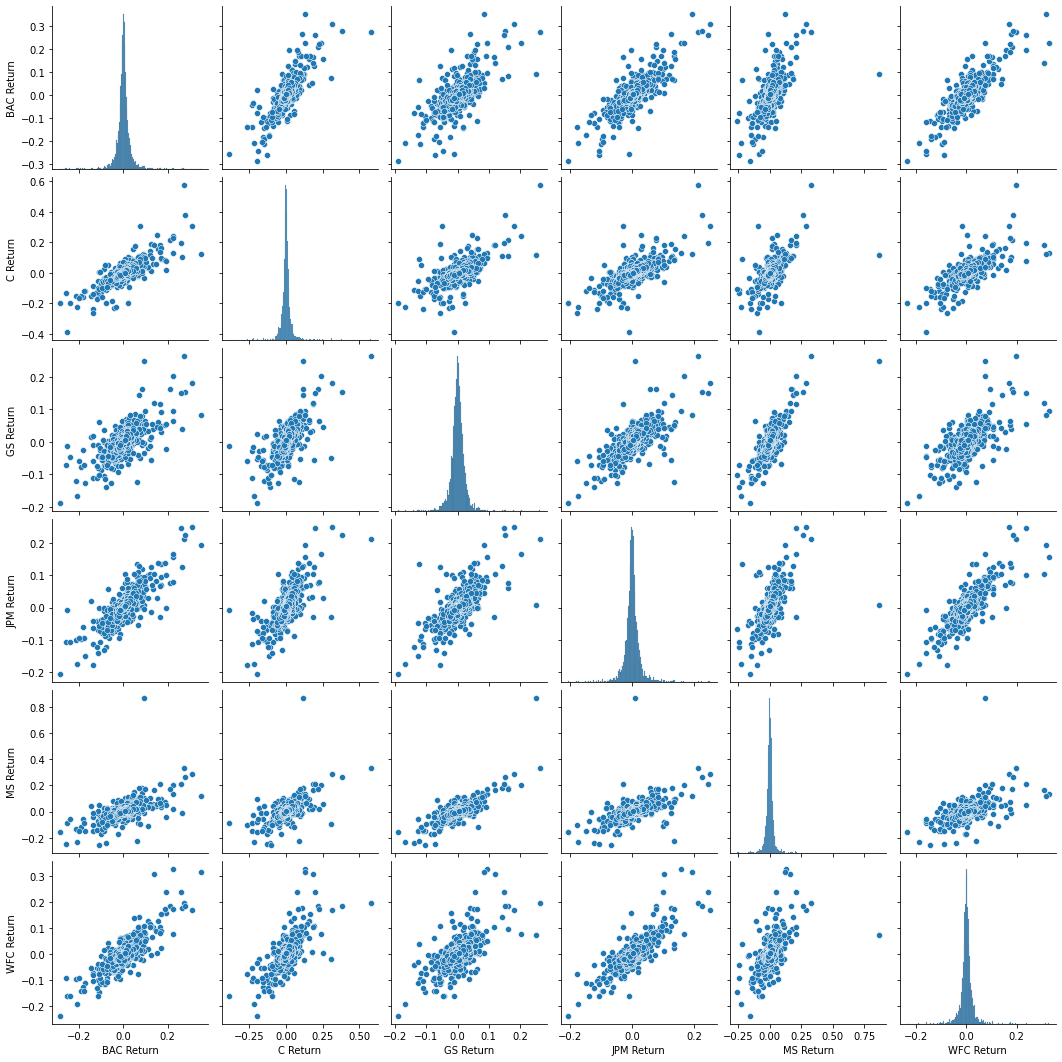

In [14]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Hintergrundinformationen zum Crash der Citigroup Aktie gibts [hier](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29).

Man sieht außerdem einen enormen Crash im Wert der Aktien (was wir bei den Visualisierungen später noch tun werden).

**Unter Verwendung des return DataFrame: finde heraus an welchem Tag die jeweiligen Banken die besten und schlechtesten Eintagesrenditen hatten. Dabei sollte dir auffallen, dass 4 der Banken ihren schlechtesten am selben Tag hatte. Was passierte an diesem Tag?**

In [15]:
returns.idxmin() # Inauguration Day in den USA

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [16]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

**Dabei sollte aufgefallen sein, dass der größte Einbruch und Gewinn der Citigroup nahe zusammen liegen. Ist etwas signifikantes passiert?**

[Citigroup had a stock split.](https://www.google.com/webhp?sourceid=chrome-instant&ion=1&espv=2&ie=UTF-8#q=citigroup+stock+2011+may)

**Betrachte jetzt die Standardabweichung der Renditen. Welche Aktie würdest du demnach als die riskanteste über den gesamten Zeitraum hinweg bezeichnen? Welche würdest du als riskanteste im Jahr 2016 bezeichnen?**

In [17]:
returns.std()

BAC Return    0.035429
C Return      0.037307
GS Return     0.024719
JPM Return    0.026791
MS Return     0.036476
WFC Return    0.029163
dtype: float64

In [18]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010606,-0.018501,-0.013582,-0.014228,0.000808,-0.011619
2006-01-05,0.001288,0.004925,-0.000365,0.003051,0.002717,-0.000973
2006-01-06,-0.001505,0.000000,0.013865,0.007064,0.001001,0.005672
2006-01-09,0.000656,-0.004695,0.012146,0.016236,0.010460,0.000000


In [19]:
returns.loc['2016-01-01':'2016-12-31'].head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-04,-0.023653,-0.011970,-0.017078,-0.030053,-0.010382,-0.026687
2016-01-05,0.000000,-0.005300,-0.017130,0.001727,-0.006351,-0.000334
2016-01-06,-0.021356,-0.014572,-0.024648,-0.014416,-0.024886,-0.019152
2016-01-07,-0.036007,-0.051048,-0.030696,-0.040437,-0.049974,-0.028485
2016-01-08,-0.019454,-0.030002,-0.004082,-0.022462,-0.020623,-0.016691


In [31]:
returns.loc['2016-01-01':'2016-12-31'].std()

BAC Return    0.020284
C Return      0.020023
GS Return     0.016909
JPM Return    0.015537
MS Return     0.020530
WFC Return    0.014976
dtype: float64

**Erstelle ein `distplot` mit Seaborn für die Renditen von Morgan Stranley in 2016.**

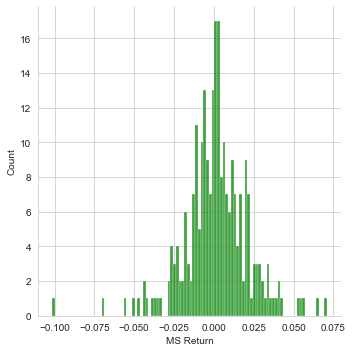

In [34]:
sns.displot(returns.loc['2016']['MS Return'],color='green',bins=100)

**Erstelle ein `distplot` mit Seaborn für die Renditen der CitiGroup in 2015.**

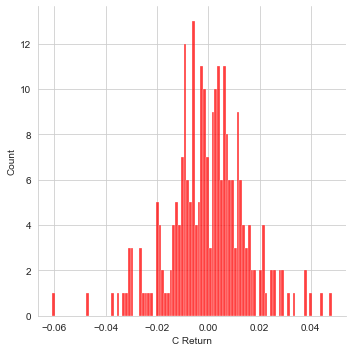

In [33]:
sns.displot(returns.loc['2015']['C Return'],color='red',bins=100)

## Mehr Visualisierungen

Der folgende Teil dieses Projekts dreht sich komplett um Visualisierungen.  Nutze dabei eine Library deiner Wahl, oder mehrere. Ziel ist es, die abgebildeten Visualisierungen nachzustellen. Wähle zwischen Seaborn, Matplotlib, Plotly, Cufflinks oder einfach Pandas.

### Importe

In [22]:
# Installieren die neuste cufflinks Version, weil wir plot
%pip install cufflinks==0.17.0

  Using cached cufflinks-0.17.0.tar.gz (81 kB)
  Created wheel for cufflinks: filename=cufflinks-0.17.0-py3-none-any.whl size=68549 sha256=f0c51b5240a43dbbcd744f1279e8668905597e64177150863a7854a8749188be
  Stored in directory: c:\users\-t-\appdata\local\pip\cache\wheels\ec\76\d5\88df45a08fc3118786a412f1df66d5f105d3e47fc23cddffd0
Successfully built cufflinks
  Attempting uninstall: cufflinks
    Found existing installation: cufflinks 0.17.3
    Uninstalling cufflinks-0.17.3:
      Successfully uninstalled cufflinks-0.17.3
Note: you may need to restart the kernel to use updated packages.


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports

import chart_studio.plotly as py
from chart_studio.plotly import plot
import cufflinks as cf
cf.go_offline()

**Erstelle ein Liniendiagramm, das die Tagesschlusspreise für jede Bank für die gesamte Zeitperiode zeigt.**

*Hinweis: Eine `for` Schleife oder .xs können funktionieren.*

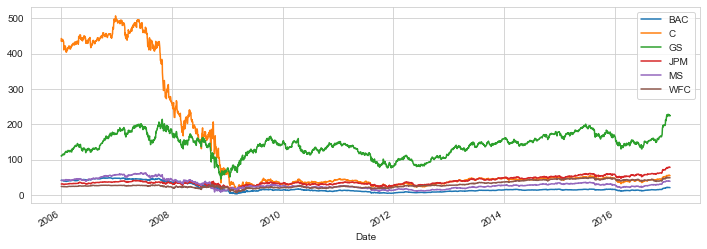

In [24]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<AxesSubplot:xlabel='Date'>

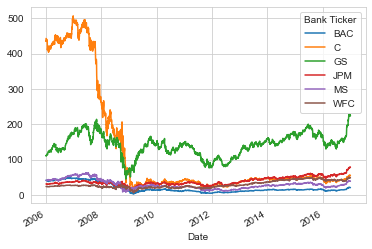

In [25]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [26]:
# Plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

### Laufender Durchschnitt

Lasst uns den laufenden Durchschnitt für diese Aktien im Jahr 2014 berechnen.

**Zeichne den laufenden 30-Tages-Durchschnitt gegen den Tagesschlusspreis für die Bank of America im Jahr 2014.**

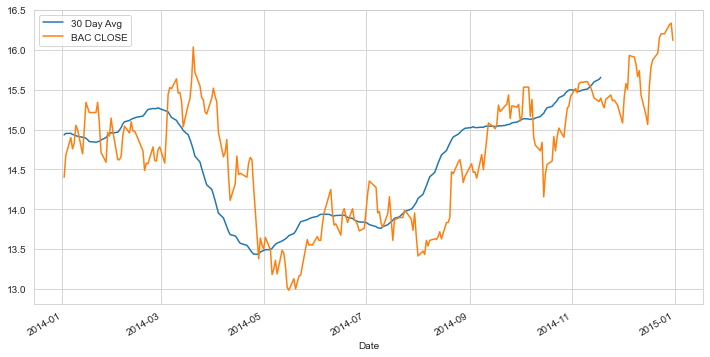

In [27]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2014'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2014'].plot(label='BAC CLOSE')
plt.legend()

**Erstelle eine `heatmap` der Korrelation zwischen den Schlusspreisen der Banken.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

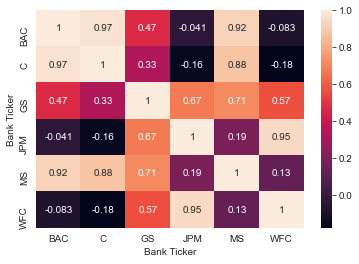

In [28]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

**Optional: Nutze die `clustermap` aus Seaborn, um die Korrelationen zu clustern.**

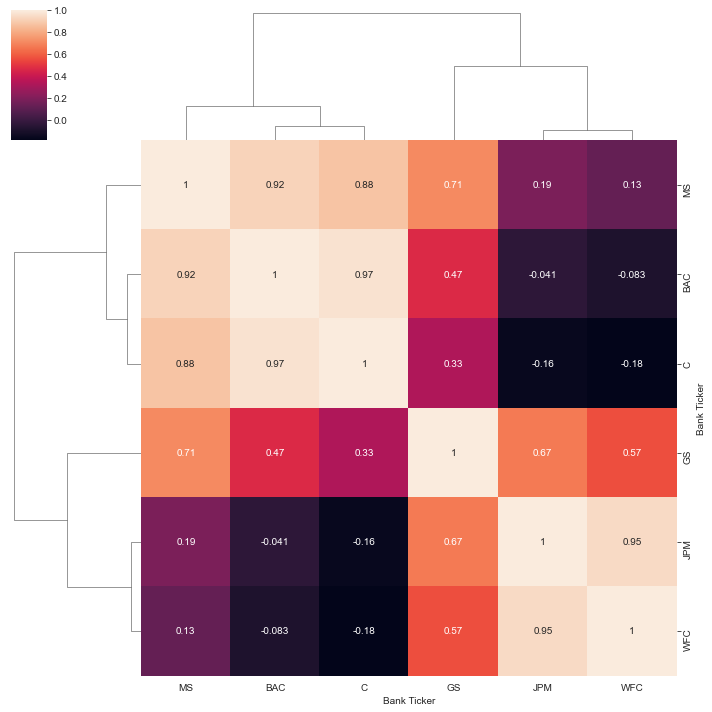

In [29]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [30]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Gut gemacht!